In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error as mse

In [2]:
import pandas as pd

csv_file_path = 'close.csv'

df = pd.read_csv(csv_file_path, header=None)

close = df[0].tolist()
logclose = np.log(close).tolist()




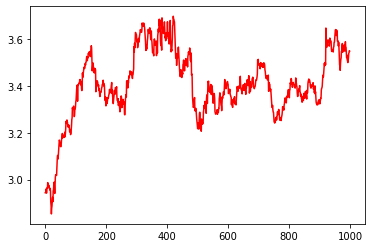

In [3]:
from math import floor

size = len(logclose)-100
close_train, close_test = close[0:size], close[size:len(close)]
logclose_train, logclose_test = logclose[0:size], logclose[size:len(logclose)]

series = logclose
train = logclose_train
test = logclose_test

plt.plot(series , color = 'r')
plt.show()


In [4]:
predicted_list, error_list = [], []
training_data = train

In [5]:
import pandas as pd

csv_file_path = 'forecasted_logclose_ARIMA_t_GARCH_t.csv'

df = pd.read_csv(csv_file_path, header=None)

predicted_list = df[0].tolist()

print(predicted_list)

[3.3426, 3.3362, 3.324, 3.3308, 3.3394, 3.3479, 3.3475, 3.3831, 3.3902, 3.3926, 3.4, 3.427, 3.4463, 3.437, 3.4409, 3.4609, 3.4878, 3.4976, 3.4866, 3.4897, 3.5015, 3.4912, 3.6478, 3.5981, 3.5652, 3.5661, 3.574, 3.5893, 3.5967, 3.5893, 3.5931, 3.5926, 3.5967, 3.5706, 3.5823, 3.6049, 3.5909, 3.5945, 3.5926, 3.5918, 3.5587, 3.5478, 3.5567, 3.5553, 3.5504, 3.5518, 3.5455, 3.5652, 3.568, 3.5862, 3.5871, 3.6044, 3.6208, 3.6384, 3.6412, 3.6219, 3.6157, 3.6389, 3.6307, 3.6336, 3.5912, 3.5937, 3.5879, 3.5709, 3.5868, 3.561, 3.5189, 3.4897, 3.4888, 3.4671, 3.4979, 3.5135, 3.5206, 3.5492, 3.549, 3.57, 3.5818, 3.5446, 3.5507, 3.5638, 3.5584, 3.5748, 3.5723, 3.5731, 3.5492, 3.5692, 3.5893, 3.5669, 3.5655, 3.5388, 3.5218, 3.5324, 3.5114, 3.5084, 3.5003, 3.5069, 3.52, 3.5397, 3.5426, 3.551]


In [6]:
for t in range(len(test)):
    predicted_value = predicted_list[t]
    obs = test[t]
    error_list.append(obs - predicted_value)
    training_data.append(obs)
    print('predicted=%f, expected=%f error=%f' % (predicted_value, obs,abs(predicted_value-obs)))

predicted=3.342600, expected=3.335414 error=0.007186
predicted=3.336200, expected=3.323236 error=0.012964
predicted=3.324000, expected=3.330059 error=0.006059
predicted=3.330800, expected=3.338613 error=0.007813
predicted=3.339400, expected=3.347093 error=0.007693
predicted=3.347900, expected=3.346741 error=0.001159
predicted=3.347500, expected=3.382354 error=0.034854
predicted=3.383100, expected=3.389462 error=0.006362
predicted=3.390200, expected=3.391820 error=0.001620
predicted=3.392600, expected=3.399195 error=0.006595
predicted=3.400000, expected=3.426215 error=0.026215
predicted=3.427000, expected=3.445533 error=0.018533
predicted=3.446300, expected=3.436243 error=0.010057
predicted=3.437000, expected=3.440098 error=0.003098
predicted=3.440900, expected=3.460095 error=0.019195
predicted=3.460900, expected=3.487069 error=0.026169
predicted=3.487800, expected=3.496811 error=0.009011
predicted=3.497600, expected=3.485845 error=0.011755
predicted=3.486600, expected=3.488903 error=0.

In [7]:
error = mse(test, predicted_list)
print('Test MSE: %.3f' % error)

Test MSE: 0.001


In [8]:
import pandas as pd

csv_file_path = 'rawResiduals_ARIMA_t_GARCH_t.csv'

df = pd.read_csv(csv_file_path, header=None)

training_error = np.array(df[0].tolist())

print(training_error)


[-1.5417e-03 -2.4438e-04  3.9548e-03  1.0688e-02 -1.9062e-02  1.3369e-02
  8.0307e-03 -2.3184e-03  2.2700e-02 -8.3639e-03 -9.9593e-03  2.3014e-03
  1.2721e-03 -1.3091e-02 -2.5443e-04 -8.5449e-03  5.9702e-03 -1.2728e-02
 -4.7341e-02 -1.5676e-02 -3.6438e-02  2.3711e-02  9.3020e-03  2.3976e-02
  1.0571e-02 -1.9200e-02  4.4679e-02  5.4824e-03  2.3858e-02  6.2999e-03
 -2.6773e-02 -2.3232e-02  3.4521e-02  3.3810e-02  9.0332e-03 -3.2128e-03
  1.6712e-03 -3.2128e-03  3.4776e-02  2.5314e-02  2.1957e-02  1.2764e-04
 -1.6156e-02  1.9541e-02  1.8699e-02  1.7467e-02  2.2199e-02 -4.9849e-03
 -7.5505e-03 -1.4901e-02 -1.6336e-03 -3.3637e-03  3.5470e-03  2.0543e-02
  1.0552e-02  9.1878e-03  9.0896e-03 -1.9756e-02  5.8737e-03  1.2966e-03
  1.2923e-03 -3.5871e-04 -9.8769e-03  1.0393e-02  1.0270e-02 -2.0484e-02
  1.3642e-02  1.9465e-02  3.0389e-02 -9.3512e-03  8.9739e-03  4.2592e-03
 -8.5198e-03 -4.2776e-03 -1.8491e-02 -1.9634e-03  1.6130e-03  5.5583e-03
 -4.3260e-03 -1.0713e-02 -1.6887e-02  8.5278e-03  3

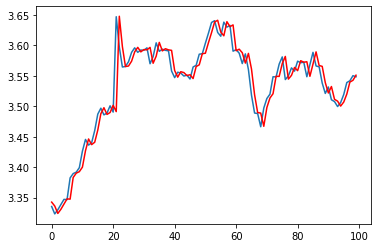

Test MSE: 0.000532


In [9]:
plt.plot(test)
plt.plot(predicted_list, color='red')
plt.show()

error = mse(test,predicted_list)
print('Test MSE: %.6f' % error)

In [10]:
from keras.models import Sequential
from keras.layers import Dense,Activation
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error as mse

In [11]:
import numpy as np
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.preprocessing import RobustScaler, RobustScaler
from sklearn.svm import SVR
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK
import hyperopt
import warnings

training_error = np.array(training_error).reshape(-1,1)

space = {
    "window_size": hp.choice("window_size", range(2,20)),
    "kernel": hp.choice("kernel", ["linear", "poly", "rbf"]),
    "C": hp.loguniform("C", np.log(0.001), np.log(100)),
    "epsilon": hp.loguniform("epsilon", np.log(0.00001), np.log(1)),
    "gamma": hp.choice("gamma", ["scale", "auto"]),
    "degree": hp.quniform("degree", 2, 4, 1),  
    "coef0": hp.uniform("coef0", -5, 5)      
}

def objective(params):
    window_size = params["window_size"]
    kernel = params["kernel"]
    C = params["C"]
    epsilon = params["epsilon"]

    scaler = RobustScaler()

    training_error_scaled = scaler.fit_transform(training_error)
    train_X, train_Y = [], []
    for i in range(len(training_error_scaled) - window_size):
        train_X.append(training_error_scaled[i:i+window_size])
        train_Y.append(training_error_scaled[i+window_size])
    new_train_X = np.array([x.reshape(-1) for x in train_X])
    new_train_Y = np.array(train_Y).ravel()

    svr_params = {"C": C, "epsilon": epsilon}
    
    if kernel == "poly":
        svr_params["gamma"] = params["gamma"]
        svr_params["degree"] = int(params["degree"])  
        svr_params["coef0"] = (params["coef0"])    
    elif kernel == "rbf":
        svr_params["gamma"] = params["gamma"]

    model = SVR(kernel=kernel, **svr_params)

    tscv = TimeSeriesSplit(n_splits=2)
    score = np.mean(cross_val_score(model, new_train_X, new_train_Y, cv=tscv, scoring='neg_mean_squared_error', n_jobs=-1))
    
    return {"loss": -score, "status": STATUS_OK}

trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=100,
            trials=trials,
            rstate=np.random.default_rng(42))

best_loss = trials.best_trial['result']['loss']
best_score = best_loss

print("\n------------------------")
print("BEST OVERALL RESULTS:")
print("------------------------")
print("Best parameters (raw indices and values):")
print(best)
print(f"Best score: {best_score:.4f}")


100%|██████████| 100/100 [00:11<00:00,  8.72trial/s, best loss: 0.9332632933344887]

------------------------
BEST OVERALL RESULTS:
------------------------
Best parameters (raw indices and values):
{'C': 0.0012939474918576433, 'coef0': 2.3198033737696755, 'degree': 2.0, 'epsilon': 0.7366486473102473, 'gamma': 1, 'kernel': 2, 'window_size': 0}
Best score: 0.9333


In [12]:
from sklearn.preprocessing import RobustScaler, RobustScaler
from sklearn.svm import SVR
import numpy as np

window_sizes = range(2,20)
kernels_list = ["linear", "poly", "rbf"]
gamma_list = ["scale", "auto"]

window_size = window_sizes[best["window_size"]]
best_kernel = kernels_list[best["kernel"]]
best_gamma = gamma_list[best["gamma"]]
best_C = best["C"]
best_epsilon = best["epsilon"]
best_degree = int(best["degree"]) if best_kernel == "poly" else None
best_coef0 = (best["coef0"]) if best_kernel == "poly" else None

scaler = RobustScaler()

training_error_scaled = scaler.fit_transform(training_error)
train_X, train_Y = [], []
for i in range(0, len(training_error_scaled) - window_size):
    train_X.append(training_error_scaled[i:i+window_size])
    train_Y.append(training_error_scaled[i+window_size])

new_train_X = np.array([x.reshape(-1) for x in train_X])
new_train_Y = np.array(train_Y).ravel()

svr_params = {"C": best_C, "epsilon": best_epsilon}
if best_kernel == "poly":
    svr_params["gamma"] = best_gamma
    svr_params["degree"] = best_degree
    svr_params["coef0"] = best_coef0
elif best_kernel == "rbf":
    svr_params["gamma"] = best_gamma

model = SVR(kernel=best_kernel, **svr_params)

model.fit(new_train_X, new_train_Y)


SVR(C=0.0012939474918576433, epsilon=0.7366486473102473, gamma='auto')

In [13]:
print(window_size)
print(best_kernel)
print(best_gamma)
print(best_C)
print(best_epsilon)
print(best_degree)
print(best_coef0)

2
rbf
auto
0.0012939474918576433
0.7366486473102473
None
None


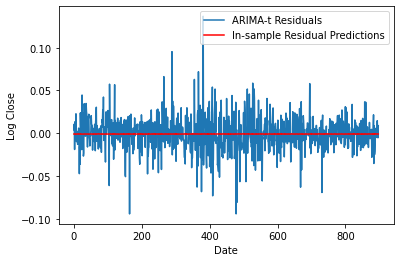

Train MSE: 0.000413


In [14]:
predictions = model.predict(new_train_X)
predictions_rescaled=scaler.inverse_transform(predictions.reshape(-1, 1))
Y = pd.DataFrame(training_error[window_size:])
pred = pd.DataFrame(predictions_rescaled)
plt.plot(Y, label='ARIMA-t Residuals')
plt.plot(pred , color = 'r', label='In-sample Residual Predictions')
plt.xlabel('Date')  
plt.ylabel('Log Close')  
plt.legend()
plt.show()
error = mse(training_error[window_size:],predictions_rescaled)
print('Train MSE: %.6f' % error)

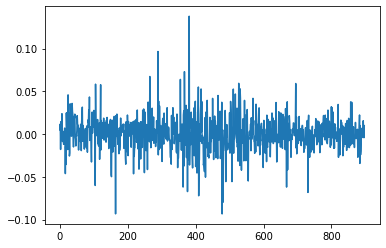

In [15]:
rawResiduals_ARIMA_t_GARCH_t_SVR = Y - pred
plt.plot(rawResiduals_ARIMA_t_GARCH_t_SVR)
plt.show()

rawResiduals_ARIMA_t_GARCH_t_SVR.to_csv('rawResiduals_ARIMA_t_GARCH_t_SVR_BO-TPE_robustscaler.csv', index=False)

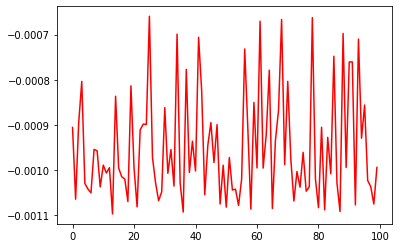

Test MSE: 0.000536


In [16]:
test_extended = training_error.tolist()[-1*window_size:] + error_list
test_data = []
for i in test_extended:
    try:
        test_data.append(i[0])
    except:
        test_data.append(i)
        
test_data = np.array(test_data).reshape(-1,1)
test_scaled = scaler.transform(test_data)

test_X,test_Y = [],[]
for i in range(0 , len(test_scaled) - window_size):
    test_X.append(test_scaled[i:i+window_size])
    test_Y.append(test_scaled[i+window_size])

new_test_X,new_test_Y = [],[]
for i in test_X:
    new_test_X.append(i.reshape(-1))
for i in test_Y:
    new_test_Y.append(i.reshape(-1))
new_test_X = np.array(new_test_X)
new_test_Y = np.array(new_test_Y)

predictions = model.predict(new_test_X)
predictions_rescaled=scaler.inverse_transform(predictions.reshape(-1, 1))


Y = pd.DataFrame(error_list)
pred = pd.DataFrame(predictions_rescaled)

plt.plot(predictions_rescaled , color = 'r')
plt.show()
error = mse(error_list,predictions_rescaled)
print('Test MSE: %.6f' % error)

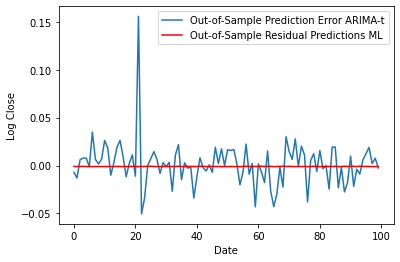

Test MSE: 0.000536


In [17]:
plt.plot(Y, label='Out-of-Sample Prediction Error ARIMA-t')
plt.plot(pred , color = 'r', label='Out-of-Sample Residual Predictions ML')
plt.xlabel('Date')  
plt.ylabel('Log Close')  
plt.legend()
plt.show()
error = mse(error_list,predictions_rescaled)
print('Test MSE: %.6f' % error)

Hybrid Test MSE: 0.000536


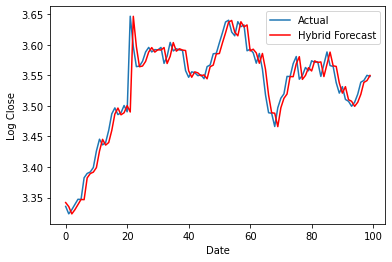

In [18]:
predicted_array = np.array(predicted_list)
final_pred = predicted_array+predictions_rescaled.flatten()
hybrid_error = mse(np.array(test), final_pred)
print('Hybrid Test MSE: %.6f' % hybrid_error)

plt.plot(pd.DataFrame(test), label="Actual")
plt.plot(pd.DataFrame(final_pred), color='r', label="Hybrid Forecast")
plt.xlabel('Date')  
plt.ylabel('Log Close')  
plt.legend()
plt.show()

In [19]:
import sys
sys.path.append('../Functions/Performance Metrics/')
from forecast_metrics import compute_error_metrics, compute_directional_metrics
print("Errors on logclose: ")
print(compute_error_metrics(test, final_pred))
print(compute_directional_metrics(test, final_pred))


Errors on logclose: 
{'NMSE': 0.09472620363923792, 'MAE': 0.014676889694526789, 'RMSE': 0.023158781585650504, 'MSE': 0.0005363291645318649, 'MAPE': 0.41385693452600714, 'TheilsU': 1.0015775851628144}
{'DA': 0.43434343434343436, 'DS': 0.494949494949495, 'CU': 0.5614035087719298, 'CD': 0.40476190476190477}


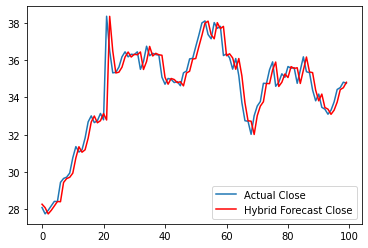

Test MSE: 0.660753


In [20]:
close_pred = np.exp(final_pred)
Y = pd.DataFrame(close_test)
pred = pd.DataFrame(close_pred)
plt.plot(Y, label="Actual Close")
plt.plot(pred , color = 'r', label="Hybrid Forecast Close")
plt.legend()
plt.show()

error = mse(close_test,close_pred)
print('Test MSE: %.6f' % error)

In [21]:
import sys
sys.path.append('../Functions/Performance Metrics/')
from forecast_metrics import compute_error_metrics, compute_directional_metrics
print("Errors on close: ")
print(compute_error_metrics(close_test, close_pred))
print(compute_directional_metrics(close_test, close_pred))

Errors on close: 
{'NMSE': 0.10783534955408196, 'MAE': 0.5075159605003121, 'RMSE': 0.812866876211096, 'MSE': 0.6607525584411853, 'MAPE': 1.4580785118220163, 'TheilsU': 1.0014934940071993}
{'DA': 0.43434343434343436, 'DS': 0.494949494949495, 'CU': 0.5614035087719298, 'CD': 0.40476190476190477}


Stock: 28.09 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 28090.0
Stock: 27.75 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 28090.0
Stock: 27.94 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 28090.0
Stock: 28.18 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 28090.0
Stock: 28.42 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 28090.0
Stock: 28.41 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 28090.0
Stock: 29.44 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 28090.0
Stock: 29.65 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 28090.0
Stock: 29.72 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 28090.0
Stock: 29.94 Action: Price-P


Stock: 38.0 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 29215.68
Stock: 38.11 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 29215.68
Stock: 37.38 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 29215.68
Stock: 37.15 Action: Buy Portfolio: 29199.9 Stocks: 786 Balance_init: 15 total($) 29214.9
Stock: 38.02 Action: Sell Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 29898.72
Stock: 37.71 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 29898.72
Stock: 37.82 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 29898.72
Stock: 36.25 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 29898.72
Stock: 36.34 Action: Buy Portfolio: 29871.48 Stocks: 822 Balance_init: 27 total($) 29898.48
Stock: 36.13 Action: Sell Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 29725.8

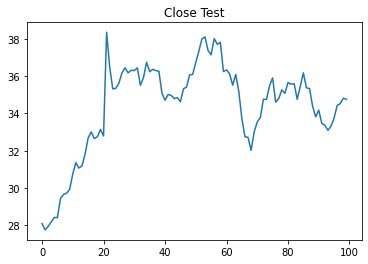

Final value of stock:
34.76


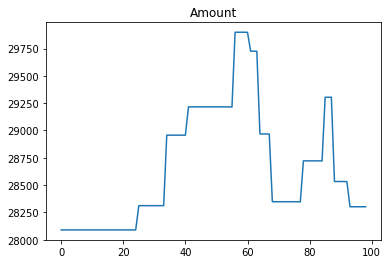

Final value of portfolio:
28302.0


In [ ]:
import sys
sys.path.append('../Functions/Performance Metrics/')
from trading_strategies import trading_strategy1

trading_strategy1(close_test, close_pred)
            